# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I'll focus on bank stocks and see how they progress throughout the COVID 19 crises

In [1]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

For this project I will use stock information for the biggest six banks in the US:

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** I am using the IEX sandbox environment to craft my API requests beacuse it is free of charge. However, note that the IEX Cloud sandbox only returns randomized test data and is meant to mimic the results returned from the production API. The sandbox environment cannot be used to access real financial data.  ** 

In [2]:
import datetime

In [4]:
end = datetime.date.today()
delta = datetime.timedelta(days=365*5+2)
start = end-delta
start

datetime.date(2015, 10, 6)

** List of the ticker symbols (as strings) in alphabetical order **

In [5]:
tickers = 'BAC C GS JPM MS WFC'.split()

In [6]:
bank_stocks = data.DataReader(tickers,'iex',start,end)
bank_stocks.head()

Attributes   open                                       high                 \
Symbols       BAC      C      GS    JPM     MS    WFC    BAC      C      GS   
date                                                                          
2015-10-06  16.15  52.46  187.10  63.18  32.32  54.16  16.02  52.70  189.23   
2015-10-07  15.96  53.54  184.80  63.12  33.77  54.10  16.20  52.65  184.21   
2015-10-08  16.06  51.73  182.30  62.35  34.45  53.40  15.80  53.29  187.51   
2015-10-09  15.80  53.81  189.79  64.80  33.85  54.60  16.55  53.23  184.88   
2015-10-12  16.10  53.89  182.10  63.94  33.74  52.33  16.03  53.97  185.80   

Attributes         ...   close                         volume            \
Symbols       JPM  ...      GS    JPM     MS    WFC       BAC         C   
date               ...                                                    
2015-10-06  63.18  ...  188.67  63.89  33.39  53.72  67650241  12864762   
2015-10-07  63.95  ...  185.87  62.31  34.30  52.48  67637418  17015762   
2015-10-08  65.19  ...  184.90  64.18  33.88  55.03  79879762  16984639   
2015-10-09  63.46  ...  186.12  62.18  33.90  53.79  77592076  14799328   
2015-10-12  63.08  ...  183.26  61.73  33.70  52.27  51488912  11231223   

Attributes                                         
Symbols          GS       JPM        MS       WFC  
date                                               
2015-10-06  1859940  12575847   9098568  14729149  
2015-10-07  2596875  13415605  14040222  14146535  
2015-10-08  3365026  13998739  11553691  15720719  
2015-10-09  3344861  12623343  11745076  17431439  
2015-10-12  3171309  11049127   7375408  10892542  

[5 rows x 30 columns]

Let's explore the data a bit! 

** The max Close price for each bank's stock throughout the time period.**

In [7]:
bank_stocks['close'].max()

Symbols
BAC     36.61
C       85.06
GS     287.03
JPM    145.70
MS      61.68
WFC     68.33
dtype: float64

** I am going to create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

In [9]:
for ticker in tickers:
    returns[ticker+' Return'] = bank_stocks['close'][ticker].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2015-10-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-07,-0.001829,-0.021304,-0.014841,-0.024730,0.027254,-0.023083
2015-10-08,-0.033598,0.016994,-0.005219,0.030011,-0.012245,0.048590
2015-10-09,-0.001896,-0.033233,0.006598,-0.031162,0.000590,-0.022533
2015-10-12,0.000000,0.017479,-0.015366,-0.007237,-0.005900,-0.028258


** I am creating a pairplot of the returns dataframe to see if any stock stands out. **

In [12]:
sns.set_style('whitegrid')

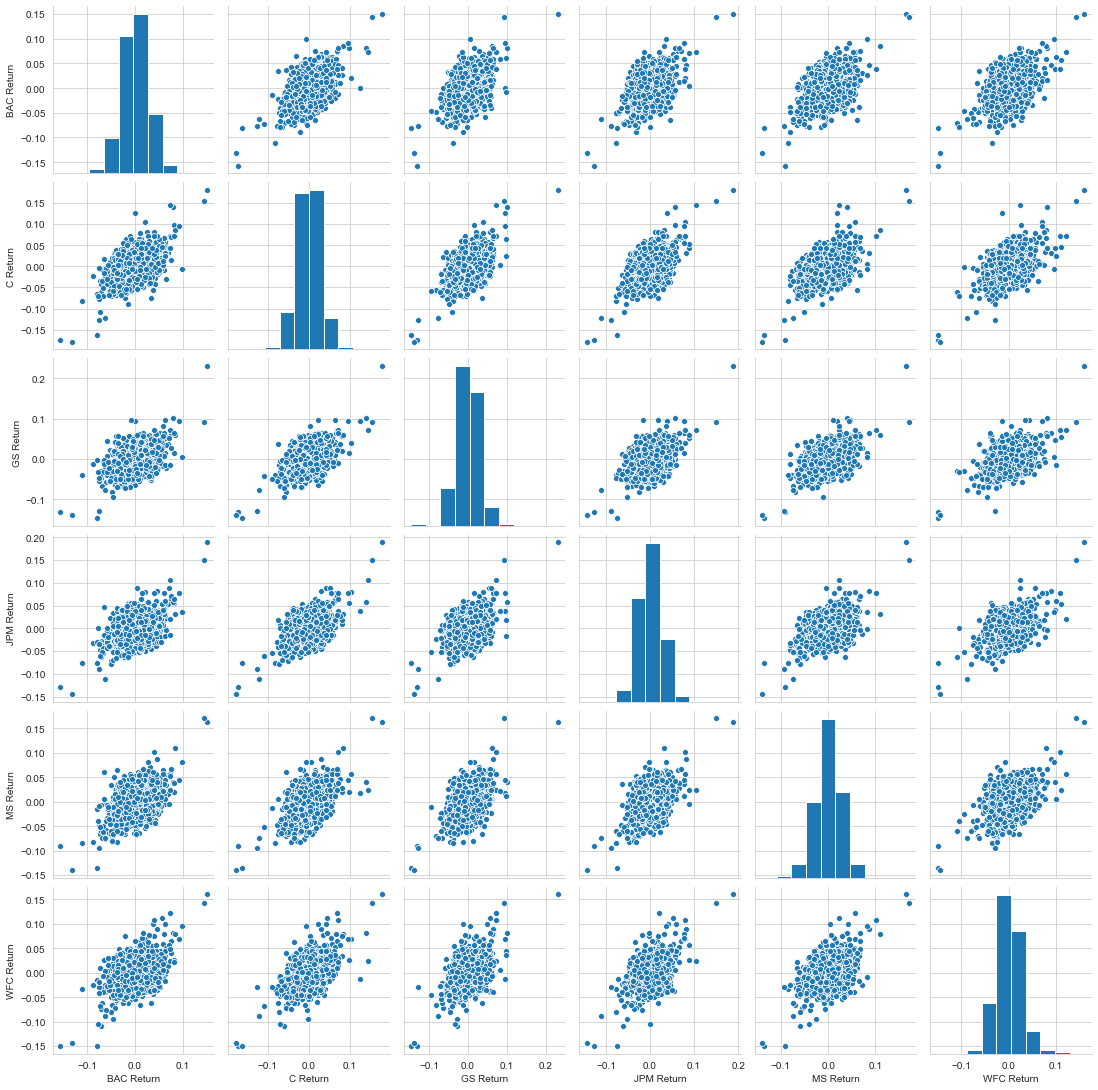

In [13]:
sns.pairplot(returns)

** Using this returns DataFrame, we can figure out on what dates each bank stock had the best and worst single day returns. What stands out is thtat all of the banks share approximately the same day for the highest surge and worst drop. The common factor for this unusual events is COVID 19**

In [14]:
returns.idxmin()

BAC Return    2020-03-09
C Return      2020-03-16
GS Return     2020-03-12
JPM Return    2020-03-16
MS Return     2020-03-16
WFC Return    2020-03-12
dtype: object

In [15]:
returns.idxmax()

BAC Return    2020-03-13
C Return      2020-03-13
GS Return     2020-03-13
JPM Return    2020-03-13
MS Return     2020-03-24
WFC Return    2020-03-13
dtype: object

** We are going to take a look at the standard deviation of the returns to get a better understanding of which stock might be classified as the most volatile or in some sense the riskiest over the entire time period. **

In [18]:
returns.std()

BAC Return    0.029318
C Return      0.031040
GS Return     0.028754
JPM Return    0.027325
MS Return     0.028623
WFC Return    0.028506
dtype: float64

** We might also be interested how the bank stocks behave in an market shocks such as COVID 19 **

In [20]:
returns.loc['2019-10-01':'2020-10-01'].std()

BAC Return    0.040548
C Return      0.046356
GS Return     0.039379
JPM Return    0.038371
MS Return     0.037946
WFC Return    0.041581
dtype: float64

** A histogram showing returns for BAC for the entire index of time **

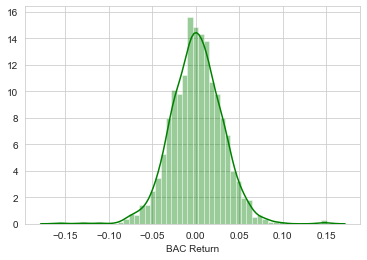

In [21]:
sns.distplot(returns['BAC Return'],bins=50,color='green')

** A histogram of the 2019/2020 returns for Bank of America **

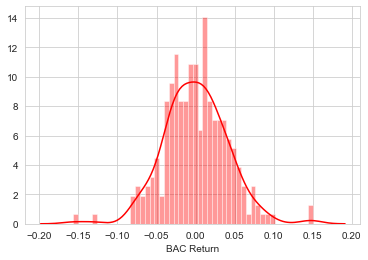

In [25]:
sns.distplot(returns.loc['2019-10-01':'2020-10-01','BAC Return'],bins=50,color='red')

In [26]:
import plotly
import cufflinks as cf
cf.go_offline()

** A line plot showing Close price for each bank for the entire index of time. **

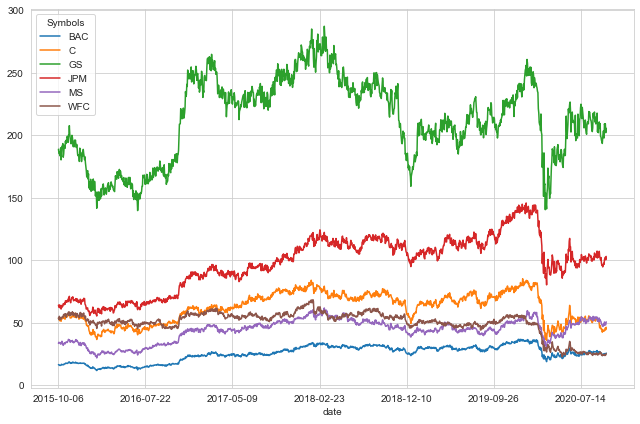

In [28]:
bank_stocks['close'].plot(figsize=(9,6))

plt.tight_layout()

## Moving Averages


** The rolling 30 day average against the Close Price for Bank Of America's stock for the year 2019/today**

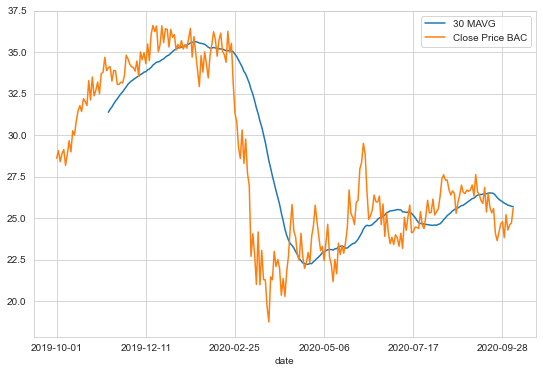

In [35]:
plt.figure(figsize=(9,6))
bank_stocks.loc['2019-10-01':]['close']['BAC'].rolling(window=30).mean().plot(label='30 MAVG')
bank_stocks.loc['2019-10-01':]['close']['BAC'].plot(label='Close Price BAC')

plt.legend()

** Visiual Representation of the correlation between the stocks Close Price.**

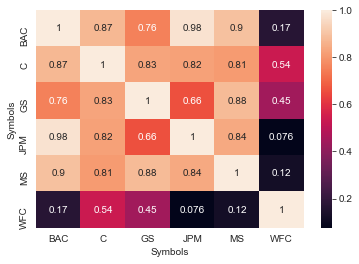

In [37]:
sns.heatmap(bank_stocks['close'].corr(),annot=True)

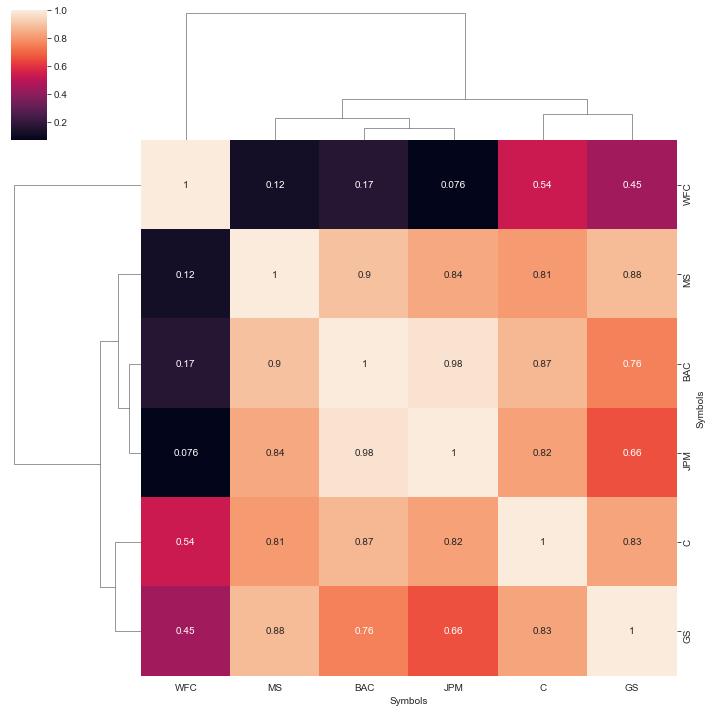

In [39]:
sns.clustermap(bank_stocks['close'].corr(),annot=True)

This section of the project rely on the cufflinks library to create a Technical Analysis plot. Since the future of cuffinks project is unceraint some functionality might be brokern at the point of time you are observing this project.

** A candle plot of Bank of America's stock from October 1st 2019 to today**

In [43]:
bank_stocks.loc['2019-10-01':].xs(key='BAC',level='Symbols',axis=1).iplot(kind='candle')

